In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [3]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/ALISHA/Data_71.csv')

In [4]:
df.head()

,CC_CARD,VALPHON,WEB,CLUSTYPE,flag sweaters,flag knit tops,flag knit dresses,flag blouses,flag jackets,flag career pants,...,z ln # different product classes,z sqrt # coupons used,z ln individual items purchased,z ln stores,z ln lifetime ave time betw visits,z ln product uniformity,z sqrt responded,z sqrt spending months 2 3,z sqrt spending months 4 5 6,RESP
0,0,N,0,10,T,F,F,T,F,T,...,-0.656349,0.741492,0.123044,-1.138349,0.770120,0.095264,-0.829399,-0.663596,-0.884061,0
1,1,Y,0,10,T,T,F,F,F,T,...,-1.600937,-0.619793,0.352548,-1.138349,-0.147921,0.134218,0.856598,0.743020,0.377783,1
2,0,N,0,16,T,F,F,F,F,F,...,-1.621998,-0.619793,-1.499289,-1.138349,0.298504,1.677075,-0.829399,-0.663596,-0.884061,0
3,1,Y,0,10,T,F,T,T,T,T,...,-2.599310,1.738022,1.224541,-1.138349,-0.616764,-0.336466,2.090832,0.927560,1.004951,0
4,0,Y,0,20,T,T,F,F,F,F,...,-3.445090,-0.619793,-0.180013,-1.138349,-0.710532,-0.055509,-0.829399,0.788841,-0.884061,0


In [5]:
feature_cols =['CLUSTYPE', 'WEB', 'VALPHON', 
'CC_CARD',
'z sqrt sweaters',
'z sqrt knit tops',
'z sqrt knit dresses',
'z sqrt blouses',
'z sqrt jackets',
'z sqrt career pants',
'z sqrt casual pants',
'z sqrt shirts',
'z sqrt dresses',
'z sqrt suits',
'z sqrt outwear',
'z sqrt jewelry',
'z sqrt fashion',
'z sqrt legwear',
'z sqrt collectibles',
'flag sweaters',
'flag knit tops',
'flag knit dresses',
'flag blouses',
'flag jackets',
'flag career pants',
'flag casual pants',
'flag shirts',
'flag dresses',
'flag suits',
'flag outerwear',
'flag jewelry',
'flag fashion',
'flag legwear',
'flag collectibles',
'flag spending AM', 'flag spending PS', 'flag spending CC', 'flag spending AX', 
'flag spending last one month', 'flag spending SPLY', 'flag returns', 
'flag response rate','flag markdown', 
'flag spending months 2 3','flag spending months 4 5 6','z ln purchase visits', 'z days since purchase',
'z GMP','z # promotions', 'z days on file', 'z markdown', 'z promotions mailed', 'z ln total net sales',
'z ln ave spending per visit','z sqrt spending AM', 'z sqrt spending PS', 'z sqrt spending CC',
'z sqrt spending AX','z sqrt spending last one month','z sqrt spending SPLY',
 'z ln days between purchases', 'z ln # different product classes','z sqrt # coupons used','z ln individual items purchased',
 'z ln stores', 'z ln lifetime ave time betw visits', 'z ln product uniformity', 'z sqrt responded', 'z sqrt spending months 2 3','z sqrt spending months 4 5 6'] 

In [6]:
df = df.replace(['Y', 'N'], [1, 0])
df = df.replace(['T', 'F'], [1, 0])

In [7]:
y_cols = 'RESP'
x_cols = feature_cols

Test Train Split

In [8]:
# split X and y into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#np.random.seed(123)
#print ( "Shape of Data:" , df.shape)
##print("Total number of RESP: {}".format(df.shape[0]))
#print("Number of Respondants: {}".format(df[df.RESP == 1].shape[0]))
#print("Number of Non-Respondants: {}".format(df[df.RESP == 0].shape[0]))
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
training_df = df.sample(frac=0.75, random_state=100)
test_df = df.drop(training_df.index)
onedf = test_df[test_df[y_cols]== 1]
zerodf = test_df[test_df[y_cols]==0]
print(len(onedf.axes[0]))
print(len(zerodf.axes[0]))
print(len(test_df.axes[0]))  

1182
6018
7200


Input Balancing Ratio

In [9]:
NR = input("Enter the fraction of non respondents: ")
print(NR)
R = input("Enter the fraction of respondants: ")
print(R)

Enter the fraction of non respondents: 75
75
Enter the fraction of respondants: 25
25


Balancing Code

In [10]:
if (  
       NR == '80' and R == '20'
   ):
      onedf = training_df[training_df[y_cols]== 1]
      zerodf = training_df[training_df[y_cols]==0]
      x=4*len(onedf.axes[0])
      zerodf1 = zerodf.sample(x)
      newdf= pd.concat([zerodf1, onedf], axis=0)
      print(len(newdf.axes[0]))
      print(len(zerodf1.axes[0]))
      print(len(onedf.axes[0]))
if (  
       NR == '65' and R == '35'
   ):
      onedf = training_df[training_df[y_cols]== 1]
      zerodf = training_df[training_df[y_cols]==0]
      x=int(1.85*len(onedf.axes[0]))
      zerodf1 = zerodf.sample(x)
      newdf= pd.concat([zerodf1, onedf], axis=0)
      print(len(newdf.axes[0]))
      print(len(zerodf1.axes[0]))
      print(len(onedf.axes[0]))


if (  
       NR == '75' and R == '25'
   ):
      onedf = training_df[training_df[y_cols]== 1]
      zerodf = training_df[training_df[y_cols]==0]
      x=3*len(onedf.axes[0])
      zerodf1 = zerodf.sample(x)
      newdf= pd.concat([zerodf1, onedf], axis=0)
      print(len(newdf.axes[0]))
      print(len(zerodf1.axes[0]))
      print(len(onedf.axes[0]))

if (   
       NR == '50' and R == '50'
   ):
      onedf = training_df[training_df[y_cols]== 1]
      zerodf = training_df[training_df[y_cols]==0]
      zerodf1 = zerodf.sample(frac=0.2, random_state=1)
      newdf= pd.concat([zerodf1, onedf], axis=0)
      print(len(newdf.axes[0]))
      print(len(zerodf1.axes[0]))
      print(len(onedf.axes[0]))


if (   
       NR == '90' and R == '10'
    ): 
      zerodf = training_df[training_df[y_cols]==0]
      onedf = training_df[training_df[y_cols]== 1]
      x=int(len(zerodf.axes[0])/9)
      onedf1 = onedf.sample(x)
      newdf= pd.concat([zerodf, onedf1], axis=0)
      print(len(newdf.axes[0]))
      print(len(zerodf.axes[0]))
      print(len(onedf1.axes[0]))

14320
10740
3580


In [12]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()


#fit the model with data
logreg.fit(newdf[x_cols],newdf[y_cols])


y_pred=logreg.predict(test_df[x_cols])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
# import the metrics class
from sklearn import metrics
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_df[y_cols], y_pred)
print(cnf_matrix)
fn = cnf_matrix[1,0]
fp = cnf_matrix[0,1]
tn = cnf_matrix[0,0]
tp = cnf_matrix[1,1]
print("false positive is",fp)
print("false negative is",fn)
print("true positive is",tp)
print("true negative is",tn)

cost_tn= tn*0
cost_tp= tp*(-26.40)
cost_fn= fn*(28.40)
cost_fp= fp*2
print("True Negative Cost is:",cost_tn)
print("True Positive Cost is:",cost_tp)
print("False Negative Cost is:",cost_fn)
print("False Positive Cost is:",cost_fp)
cost_total= int(cost_tn + cost_tp + cost_fn + cost_fp)
print(cost_total)
final_cost= cost_total/len(test_df.axes[0])
print("Overall cost per customer is",final_cost) 

[[5539  479]
 [ 586  596]]
false positive is 479
false negative is 586
true positive is 596
true negative is 5539
True Negative Cost is: 0
True Positive Cost is: -15734.4
False Negative Cost is: 16642.399999999998
False Positive Cost is: 958
1865
Overall cost per customer is 0.2590277777777778


In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

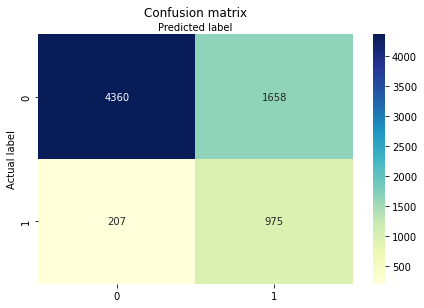

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
